# LGBM & XGBM

### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

## Exploratory Data Analysis (EDA):

### 1.	Load the Titanic dataset using Python's pandas library.

In [85]:
#import pandas library
import pandas as pd
import numpy as np

In [86]:
#Read training csv file
df_train=pd.read_csv("titanic_train.csv")
display("Training Data:\n",df_train.head())

#Read testing csv file
df_test=pd.read_csv("titanic_test.csv")
display("Testing Data:\n",df_test.head())

'Training Data:\n'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Testing Data:\n'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
# Get info about titanic_train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
#get the shape of the training dataset
display(df_train.shape)

#get the shape of the testing dataset
display(df_test.shape)

(891, 12)

(418, 11)

In [89]:
#Check for Duplicate rows
df_train.duplicated().sum()

np.int64(0)

In [90]:
#Describe the statistical summary for numerical columns
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
#Describe thestatistical summary categorical columns
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### 2.	Check for missing values.

In [92]:
#Check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
#Drop cabin column
df_train.drop(['Cabin','Name','PassengerId','Ticket'], axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [94]:
#Check for missing values after imputation
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### 3.	Explore data distributions using histograms and box plots.

In [95]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

##### Histogram

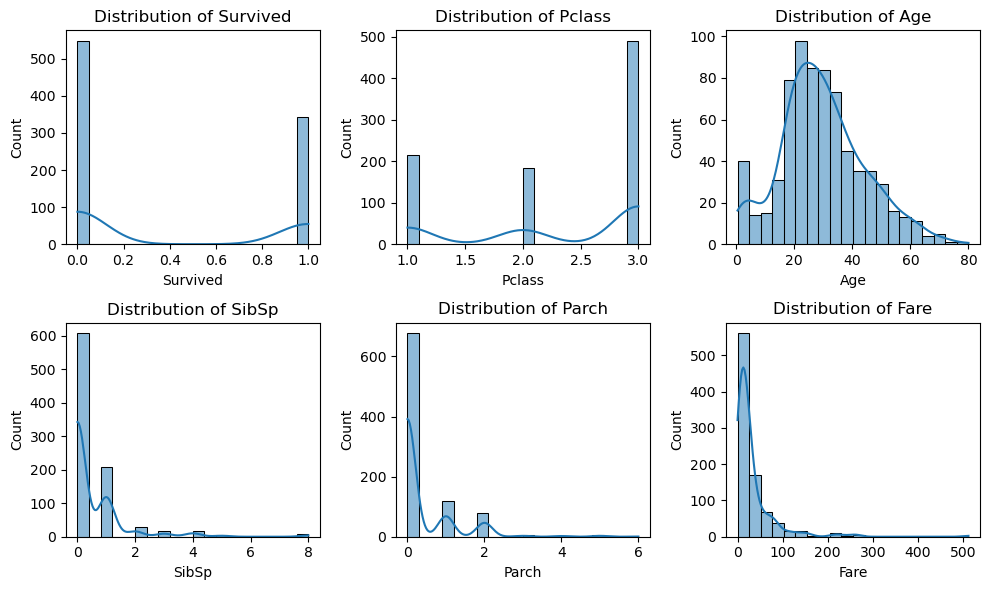

In [96]:
#Histogram
numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns

# Create subplots dynamically
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train, x=col, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


##### Boxplot

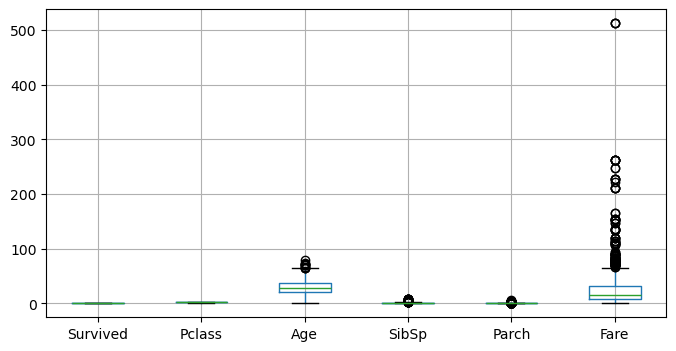

In [97]:
#Boxplot
df_train.boxplot(figsize=(8,4))
plt.show()

### 4.	Visualize relationships between features and survival using scatter plots and bar plots.

##### Scatter plot

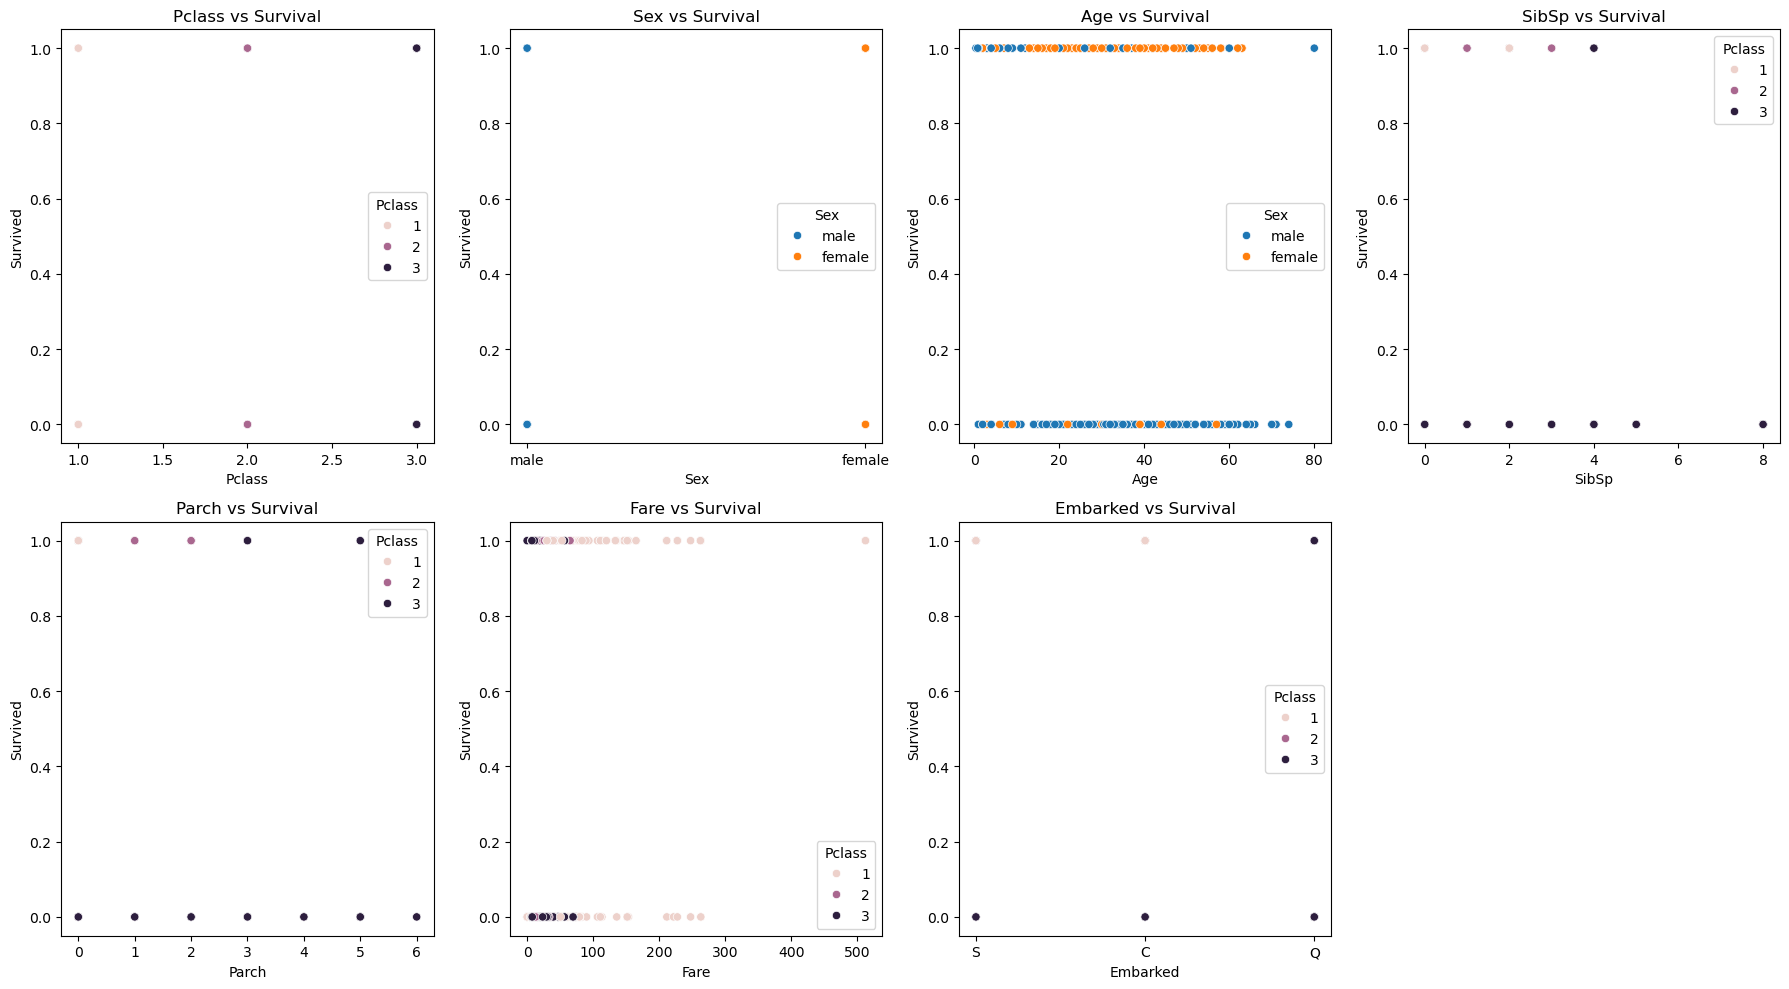

In [98]:
# Create a 2x4 grid 
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Scatter plot: Pclass vs Survival
sns.scatterplot(x='Pclass', y='Survived', data=df_train, hue='Pclass', ax=axes[0, 0])
axes[0, 0].set_title("Pclass vs Survival")

# Scatter plot: Sex vs Survival
sns.scatterplot(x='Sex', y='Survived', data=df_train, hue='Sex', ax=axes[0, 1])
axes[0, 1].set_title("Sex vs Survival")

# Scatter plot: Age vs Survival
sns.scatterplot(x='Age', y='Survived', data=df_train, hue='Sex', ax=axes[0, 2])
axes[0, 2].set_title("Age vs Survival")

# Scatter plot: SibSp vs Survival
sns.scatterplot(x='SibSp', y='Survived', data=df_train, hue='Pclass', ax=axes[0, 3])
axes[0, 3].set_title("SibSp vs Survival")

# Scatter plot: Parch vs Survival
sns.scatterplot(x='Parch', y='Survived', data=df_train, hue='Pclass', ax=axes[1, 0])
axes[1, 0].set_title("Parch vs Survival")

# Scatter plot: Fare vs Survival
sns.scatterplot(x='Fare', y='Survived', data=df_train, hue='Pclass', ax=axes[1, 1])
axes[1, 1].set_title("Fare vs Survival")

# Scatter plot: Embarked vs Survival
sns.scatterplot(x='Embarked', y='Survived', data=df_train, hue='Pclass', ax=axes[1, 2])
axes[1, 2].set_title("Embarked vs Survival")

# Hide the last empty subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


##### Bar plot

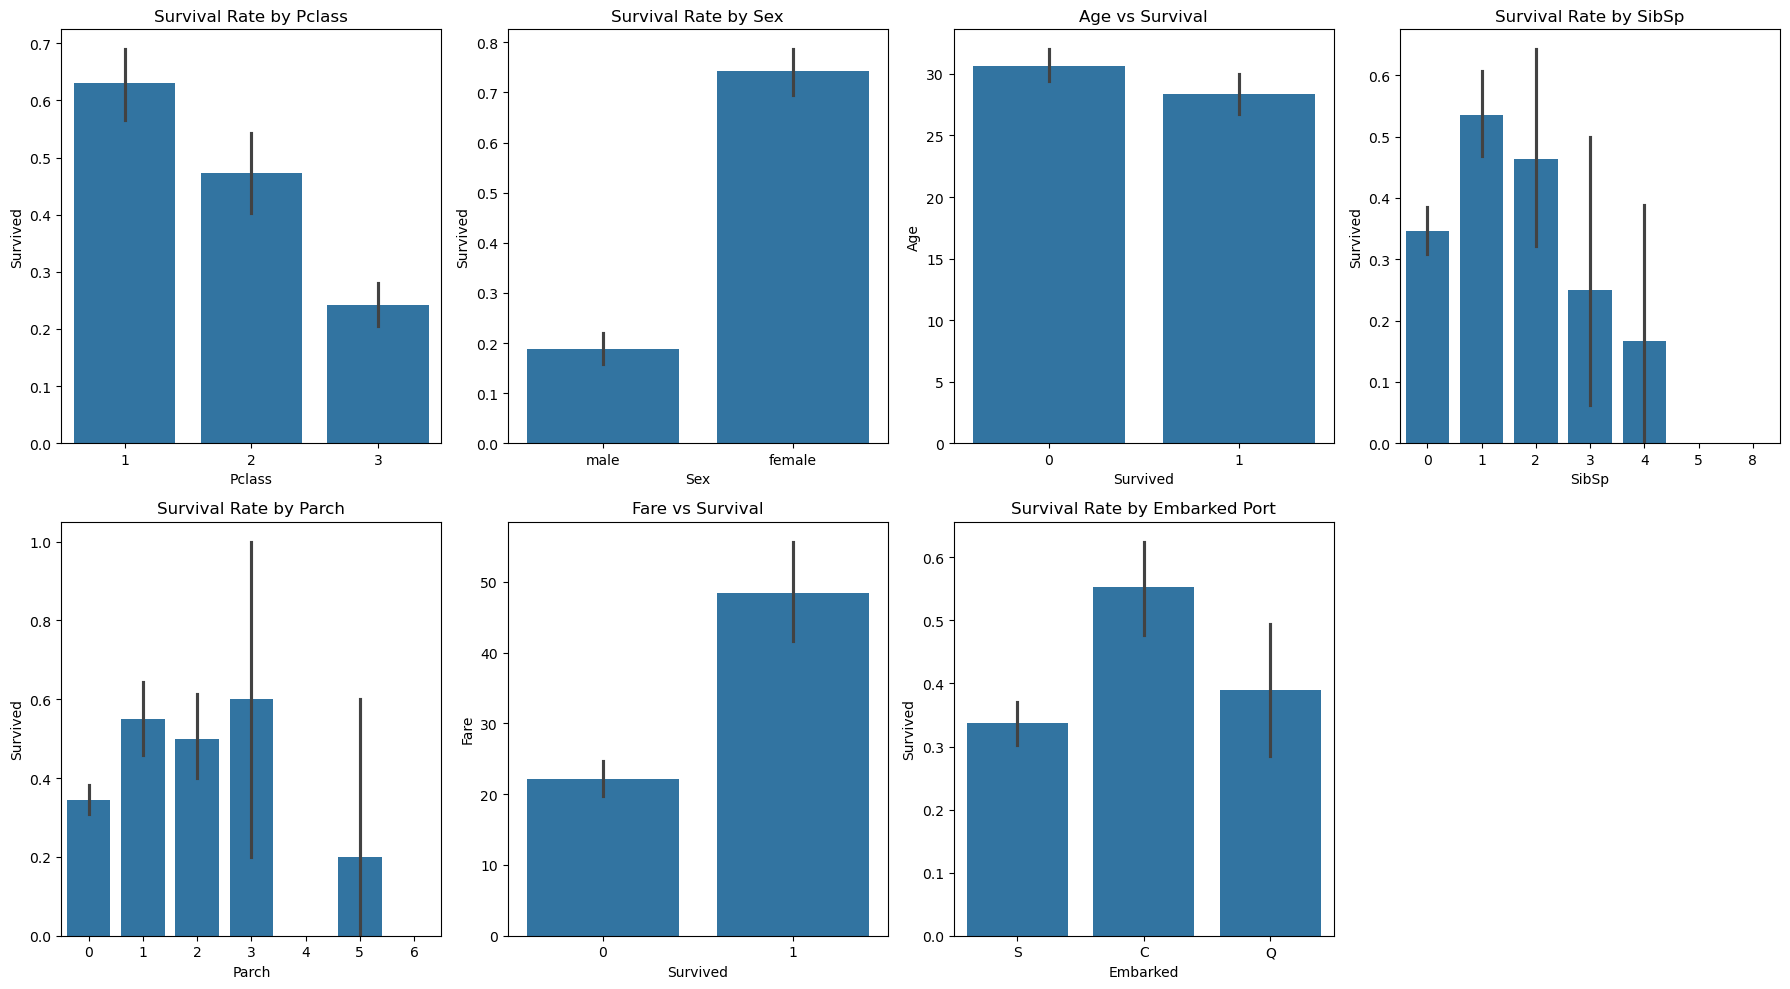

In [99]:
# Create a 2x4 grid 
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

# Bar plot: Pclass vs Survival
sns.barplot(x='Pclass', y='Survived', data=df_train, ax=axes[0, 0])
axes[0, 0].set_title("Survival Rate by Pclass")

# Bar plot: Sex vs Survival
sns.barplot(x='Sex', y='Survived', data=df_train, ax=axes[0, 1])
axes[0, 1].set_title("Survival Rate by Sex")

# Bar plot: Age vs Survival (continuous feature)
sns.barplot(x='Survived', y='Age', data=df_train, ax=axes[0, 2])
axes[0, 2].set_title("Age vs Survival")

# Bar plot: SibSp vs Survival
sns.barplot(x='SibSp', y='Survived', data=df_train, ax=axes[0, 3])
axes[0, 3].set_title("Survival Rate by SibSp")

# Bar plot: Parch vs Survival
sns.barplot(x='Parch', y='Survived', data=df_train, ax=axes[1, 0])
axes[1, 0].set_title("Survival Rate by Parch")

# Bar plot: Fare vs Survival (continuous feature)
sns.barplot(x='Survived', y='Fare', data=df_train, ax=axes[1, 1])
axes[1, 1].set_title("Fare vs Survival")

# Bar plot: Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=df_train, ax=axes[1, 2])
axes[1, 2].set_title("Survival Rate by Embarked Port")

# Hide unused subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


## Data Preprocessing:

### 1.	Impute missing values.

In [100]:
#Check for null values
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [101]:
#Fill miising values with it mean value for numeric column - age
df_train.fillna({'Age': df_train['Age'].mean()},inplace=True)
#Fill miising values with it mode value for categorical column - Embarked 
df_train.fillna({'Embarked': df_train['Embarked'].mode()[0]},inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [102]:
#Recheck null values after imputation
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 2.	Encode categorical variables using one-hot encoding or label encoding. 

In [103]:
#Seperate categorical and numerical columns
cat_cols=df_train.select_dtypes(include='object')
num_cols=df_train.select_dtypes(include='number')
print("Categorical columns:",cat_cols.columns)
print("Numerical columns:",num_cols.columns)

Categorical columns: Index(['Sex', 'Embarked'], dtype='object')
Numerical columns: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [104]:
# Convert 'Sex' column to numerical (0 or 1)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
# apply one hot encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


### 3.	If needed you can apply more preprocessing methods on the given dataset.

#### Outlier capping

In [105]:
#Outlier capping
def outlier_capping(df_train,column):
    Q1= df_train[column].quantile(0.25)
    Q3= df_train[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    num_cols[column]= num_cols[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in num_cols.select_dtypes(['int','float']).columns:
    outlier_capping(num_cols,col)

#### Recheck Outlier

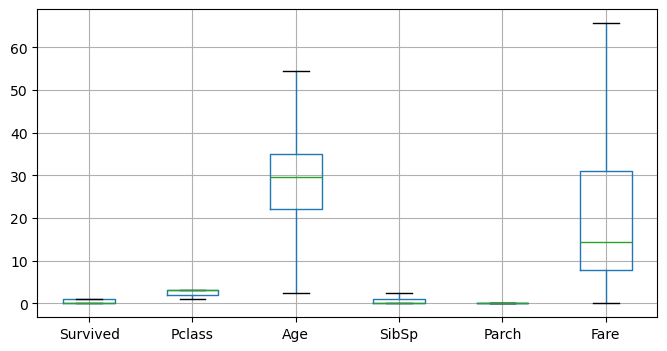

In [106]:
#Recheck for outlier 
num_cols.boxplot(figsize=(8,4))
plt.show()

#### Standardize scaling

In [107]:
#import standardization
from sklearn.preprocessing import StandardScaler

# Split features and target variable 
target=df_train['Survived']
features=df_train.drop(columns='Survived')

#List the numerical columns for encode
numerical_cols = features.select_dtypes(include=['number']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,False,True
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,False,False
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,False,True
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,False,True
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,False,True


## Building Predictive Models:

### 1.	Split the preprocessed dataset into training and testing sets.

In [108]:
#import train_test_split 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [109]:
#Split and train the logistic regression model
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [110]:
#import accuracy, precision, recall, F1-score, and ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [111]:
#Define Performance Metrics
def Performance_Metrics(y_test, y_pred):
     #Calculate performance metrics
    Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    return Accuracy,Precision,Recall,F1

### 3.	Build predictive models using LightGBM and XGBoost algorithms.

In [112]:
#install lightgbm xgboost
!pip install lightgbm xgboost

In [113]:
#import  LightGBM and XGBoost
import lightgbm as lgb
import xgboost as xgb

In [114]:
#Create LightGBM model
lgb_model=lgb.LGBMClassifier()
lgb_model

LGBMClassifier()

In [115]:
#Create XGBoost model
xgb_model= xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### 4.	Train the models on the training set and evaluate their performance on the testing set.

##### LGMB Model

In [116]:
#Train lgb model
lgb_model.fit(x_train,y_train)
#Evaluate model
y_pred_lgb= lgb_model.predict(x_test)
#Evaluate Performance metrics
lgb_acc,lgb_prec,lgb_rec,lgb_f1 = Performance_Metrics(y_test,y_pred_lgb)

print("\n\nPerformance Metrics")
print(f"Accuracy: {lgb_acc:.4f}")
print(f"Precision: {lgb_prec:.4f}")
print(f"Recall: {lgb_rec:.4f}")
print(f"F1: {lgb_f1:.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


##### XGMB Model

In [117]:
#Train xgb model
xgb_model.fit(x_train,y_train)
#Evaluate model
y_pred_xgb= xgb_model.predict(x_test)
#Evaluate Performance metrics
xgb_acc,xgb_prec,xgb_rec,xgb_f1 = Performance_Metrics(y_test,y_pred_xgb)

print("Performance Metrics")
print(f"Accuracy: {xgb_acc:.4f}")
print(f"Precision: {xgb_prec:.4f}")
print(f"Recall: {xgb_rec:.4f}")
print(f"F1: {xgb_f1:.4f}")

Performance Metrics
Accuracy: 0.7877
Precision: 0.7500
Recall: 0.7297
F1: 0.7397


### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [118]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

##### XGBM Tuning

In [119]:
# hyperparameter tuning for XGBM
param_grid = {
    'n_estimators': [5, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 5, 7]
}
#Model Tuning
xgb_modelGrid = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=3)
xgb_modelGrid.fit(x_train, y_train)

print("Best parameters for LightGBM:", xgb_modelGrid.best_params_)

#Evaluate model
y_pred_xgbGrid = xgb_modelGrid.predict(x_test)
#Evaluate Performance metrics
xgbGrid_acc,xgbGrid_prec,xgbGrid_rec,xgbGrid_f1 = Performance_Metrics(y_test,y_pred_xgbGrid)
print("\n\nPerformance Metrics")
print(f"Accuracy: {xgbGrid_acc:.4f}")
print(f"Precision: {xgbGrid_prec:.4f}")
print(f"Recall: {xgbGrid_rec:.4f}")
print(f"F1: {xgbGrid_f1:.4f}")

Best parameters for LightGBM: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


Performance Metrics
Accuracy: 0.8156
Precision: 0.8361
Recall: 0.6892
F1: 0.7556


##### LGBM Tuning

In [121]:
# hyperparameter tuning for LightGBM
param_grid = {
    'n_estimators': [5, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 5, 7]
}
lgb_modelGrid = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=3)
lgb_modelGrid.fit(x_train, y_train)

print("Best parameters for LightGBM:", lgb_modelGrid.best_params_)

#Evaluate model
y_pred_lgbGrid = lgb_modelGrid.predict(x_test)
#Evaluate Performance metrics
lgbGrid_acc,lgbGrid_prec,lgbGrid_rec,lgbGrid_f1 = Performance_Metrics(y_test,y_pred_lgbGrid)
print("\n\nPerformance Metrics")
print(f"Accuracy: {lgbGrid_acc:.4f}")
print(f"Precision: {lgbGrid_prec:.4f}")
print(f"Recall: {lgbGrid_rec:.4f}")
print(f"F1: {lgbGrid_f1:.4f}")

[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 179, number of negative: 296
[LightGB

## Comparative Analysis:

### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

##### **XGBoost Model Performance after Tuning**

In [122]:
#create dictionary
Model_xgb = {
            'Models_Performance': ["Accuracy", "Precision", "Recall","F1"],
            'Before Tuning': [f"{xgb_acc:.4f}",f"{xgb_prec:.4f}",f"{xgb_rec:.4f}",f"{xgb_f1:.4f}"],
            'After Tunning': [f"{xgbGrid_acc:.4f}",f"{xgbGrid_prec:.4f}",f"{xgbGrid_rec:.4f}",f"{xgbGrid_f1:.4f}"]
}
#Create DataFrame
Modelxgb=pd.DataFrame(Model_xgb)
Modelxgb

,Models_Performance,Before Tuning,After Tunning
0,Accuracy,0.7877,0.8156
1,Precision,0.7500,0.8361
2,Recall,0.7297,0.6892
3,F1,0.7397,0.7556


##### **LightGBM Model Performance after Tuning**

In [123]:
#create dictionary
Model_lgb = {
            'Models_Performance': ["Accuracy", "Precision", "Recall","F1"],
            'Before Tuning': [f"{lgb_acc:.4f}",f"{lgb_prec:.4f}",f"{lgb_rec:.4f}",f"{lgb_f1:.4f}"],
            'After Tunning': [f"{lgbGrid_acc:.4f}",f"{lgbGrid_prec:.4f}",f"{lgbGrid_rec:.4f}",f"{lgbGrid_f1:.4f}"]
}
#Create DataFrame
Modellgb=pd.DataFrame(Model_lgb)
Modelxgb

,Models_Performance,Before Tuning,After Tunning
0,Accuracy,0.7877,0.8156
1,Precision,0.7500,0.8361
2,Recall,0.7297,0.6892
3,F1,0.7397,0.7556


##### **Comparison between LightGBM and XGBoost Methods**

In [124]:
#create dictionary
Model_comp = {
            'Performance_Metrics': ["Accuracy", "Precision", "Recall","F1"],
            'LightGBM': [f"{lgbGrid_acc:.4f}",f"{lgbGrid_prec:.4f}",f"{lgbGrid_rec:.4f}",f"{lgbGrid_f1:.4f}"],
            'XGBoost': [f"{xgbGrid_acc:.4f}",f"{xgbGrid_prec:.4f}",f"{xgbGrid_rec:.4f}",f"{xgbGrid_f1:.4f}"]
}
#Create DataFrame
ModelComp=pd.DataFrame(Model_comp)
ModelComp

,Performance_Metrics,LightGBM,XGBoost
0,Accuracy,0.8101,0.8156
1,Precision,0.8125,0.8361
2,Recall,0.7027,0.6892
3,F1,0.7536,0.7556


### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

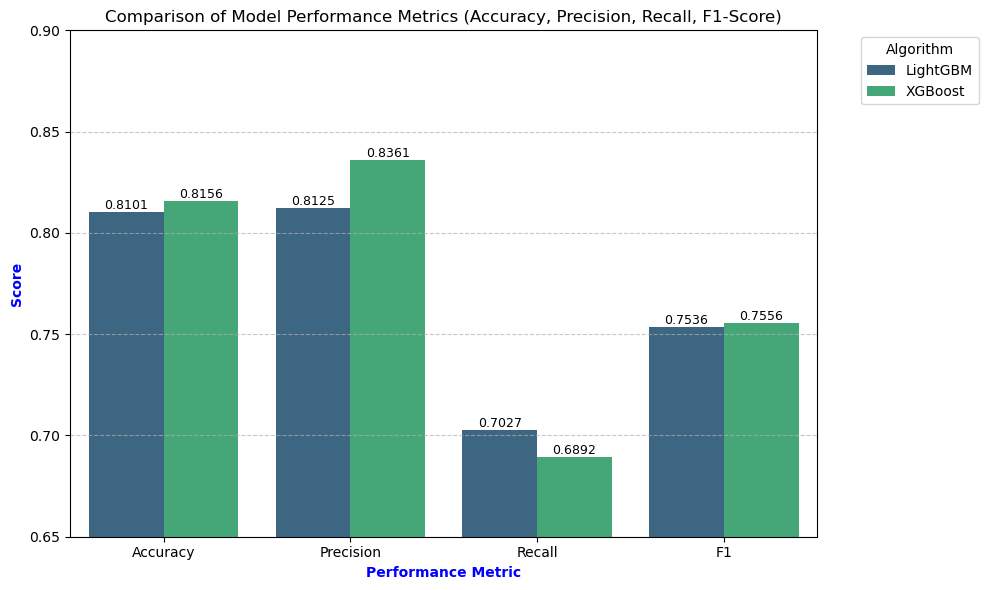

In [125]:
# Create DataFrame
ModelComp = pd.DataFrame(Model_comp)

# Convert values to numeric
for col in ['LightGBM', 'XGBoost']:
    ModelComp[col] = ModelComp[col].astype(float)

# Melt into long format
df_long = ModelComp.melt(id_vars='Performance_Metrics', var_name='Algorithm', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Performance_Metrics', y='Score', hue='Algorithm', data=df_long, palette='viridis')

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",   # label text (score)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # position
        ha='center', va='bottom', fontsize=9, color='Black', rotation=0
    )
#Plot attributes
plt.title('Comparison of Model Performance Metrics (Accuracy, Precision, Recall, F1-Score)')
plt.ylabel('Score',color='blue', fontweight='bold')
plt.xlabel('Performance Metric',color='blue', fontweight='bold')
plt.ylim(0.65, 0.90)
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Strengths and Weaknesses:

- **Strengths of LightGBM**
    Higher Recall (0.7027 vs 0.6892)

    LightGBM is better at identifying positive cases.

    This means it misses fewer true positives (lower false negatives).


- **Strengths of XGBoost**
    Higher Accuracy (0.8156 vs 0.8101): Overall, XGBoost makes slightly more correct predictions across all classes.

    Higher Precision (0.8361 vs 0.8125): When XGBoost predicts a positive, it’s more likely to be correct (fewer false positives).

    Slightly Higher F1 Score (0.7556 vs 0.7536): Since F1 balances precision and recall, XGBoost edges ahead overall.

- **Weakness:**

  - LightGBM’s weakness - More false positives, slightly weaker overall accuracy and balance.

  - XGBoost’s weakness More false negatives, weaker at catching all positives.
  
In conclusion, both LightGBM and XGBoost are powerful gradient boosting algorithms. For the Titanic survival prediction task, XGBoost appears to be the slightly superior model given the current evaluation metrics.

### A brief report summarizing the comparative analysis results and practical implications.

### comparative analysis
Performance_Metrics 

**Accuracy:**
- LightGBM: 0.8101	
- XGBoost: 0.8156

**Precision:**
- LightGBM: 0.8125
- XGBoost: 0.8361

**Recall:**
- LightGBM: 0.7027
- XGBoost: 0.6892

**F1:**
- LightGBM: 0.7536
- XGBoost: 0.7556

**Practical Implications**

- Choose XGBoost if the priority is balanced performance with higher precision and overall accuracy - ensuring predictions are more reliable and minimizing false positives.

- Choose LightGBM if the priority is maximizing recall - ensuring that as many positive cases as possible are detected, even at the cost of more false alarms.

- Since F1 Score (balance of precision and recall) is slightly higher for XGBoost, it is generally the preferred model for most applications, unless recall is the overriding concern.

**Summary:** XGBoost demonstrates stronger overall performance and is better suited for general-purpose tasks requiring balanced accuracy and precision. LightGBM, however, remains advantageous in recall-sensitive applications where missing positives could have serious consequences.